In [ ]:
import pandas as pd
import networkx as nx

In [ ]:
import os
if os.path.exists('/content/drive/'):
    print("Google Drive is mounted.")
else:
    print("Google Drive is not mounted.")

Google Drive is not mounted.


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Network Analysis for Social Scientists/Final project/Export_Import_85.xlsx'
df = pd.read_excel(file_path)
print(df.head())

  Reporter Name     Partner Name  Export (US$ Thousand)
0       Albania          Germany                   5.65
1       Albania   United Kingdom                   0.28
2       Albania           Greece                   8.12
3       Albania            Italy               29404.93
4       Albania  North Macedonia                 691.52


In [ ]:
# Rename columns
df = pd.read_excel(file_path)
df_modified = df.rename(columns={'Reporter Name': 'Source', 'Partner Name': 'Target', 'Export (US$ Thousand)': 'Value'})
# Define the desired column sequence
desired_columns = ['Source', 'Target', 'Value']

# Reassign the DataFrame with the desired column order
df_modified = df_modified[desired_columns]
# Display the first 5 rows of the DataFrame
print(df_modified.head())

    Source           Target     Value
0  Albania          Germany      5.65
1  Albania   United Kingdom      0.28
2  Albania           Greece      8.12
3  Albania            Italy  29404.93
4  Albania  North Macedonia    691.52


In [ ]:
# Check for empty data
empty_data = df_modified[df_modified.isnull().any(axis=1)]

# Display rows with empty data, if any
if not empty_data.empty:
    print("Rows with empty data found:")
    print(empty_data)
else:
    print("No empty data found.")

No empty data found.


In [ ]:
# Group the data by exporting and importing countries, then count occurrences
duplicate_country_combinations = df_modified.groupby(['Source', 'Target']).size().reset_index(name='count')

# Filter rows where count is greater than 1
duplicate_country_combinations = duplicate_country_combinations[duplicate_country_combinations['count'] > 1]

# Display duplicate country combinations
if not duplicate_country_combinations.empty:
    print("Duplicate exporting-importing country combinations found:")
    print(duplicate_country_combinations)
else:
    print("No duplicate exporting-importing country combinations found.")

No duplicate exporting-importing country combinations found.


In [ ]:
grouped_data = df_modified.groupby(['Source', 'Target'])['Value'].sum().reset_index()

# Display the first 5 rows of the DataFrame
print(grouped_data.head())

    Source       Target     Value
0  Albania      Germany      5.65
1  Albania       Greece      8.12
2  Albania        Italy  29404.93
3  Albania   Montenegro    173.56
4  Albania  Netherlands    550.36


In [ ]:
# Check for errored values in columns
column_to_check = 'Value'

# Check data type of the column
print(f"Data type of '{column_to_check}': {grouped_data[column_to_check].dtype}")

# Check for NaN values in the column
nan_values = grouped_data[column_to_check].isna().sum()
print(f"Number of NaN values in '{column_to_check}': {nan_values}")

# Check for mixed data types in the column
mixed_data_types = grouped_data[column_to_check].apply(type).nunique() > 1
print(f"Is '{column_to_check}' column having mixed data types? {mixed_data_types}")

Data type of 'Value': float64
Number of NaN values in 'Value': 0
Is 'Value' column having mixed data types? False


In [ ]:
grouped_data.to_csv('export_import_gephi.csv', index=False)

# Export data to CSV with specified column headings
df.to_csv('export_import_gephi.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('export_import_gephi.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# View a specific country in dataset
exporting_country = "China"
# Filter the dataset to include only rows corresponding to the specified exporting country
exporting_country_data = grouped_data[grouped_data['Source'] == exporting_country]
# Display the data for the specific exporting country
print(exporting_country_data.head())

     Source       Target       Value
1643  China  Afghanistan   132288.62
1644  China      Albania   173480.53
1645  China      Algeria  1786382.10
1646  China      Andorra      729.91
1647  China       Angola   550728.60


In [ ]:
# View a specific country in dataset
importing_country = "China"

# Filter the dataset to include only rows corresponding to the specified importing country
importing_country_data = grouped_data[grouped_data['Target'] == importing_country]

# Display the data for the specific exporting country
print(importing_country_data.head())

        Source Target       Value
24      Angola  China      550.41
117  Argentina  China      183.83
181  Australia  China   401607.27
386    Austria  China  1746538.76
606    Belgium  China  1232076.27


In [ ]:
# Create a directed graph
G = nx.DiGraph()

In [ ]:
# Iterate over the rows of the dataset
for _, row in grouped_data.iterrows():
    exporting_country = row['Source']
    importing_country = row['Target']
    product_value = row['Value']
    # Add nodes (countries) if not already present
    G.add_node(exporting_country)
    G.add_node(importing_country)
    # Add edge (product) from exporting country to importing country with weight as product value
    if G.has_edge(exporting_country, importing_country):
        # If edge already exists, update weight
        G[exporting_country][importing_country]['weight'] += product_value
    else:
        # If edge does not exist, add it with weight
        G.add_edge(exporting_country, importing_country, weight=product_value)

In [ ]:
# Print information about the graph
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 238
Number of edges: 9980


In [ ]:
import matplotlib.pyplot as plt

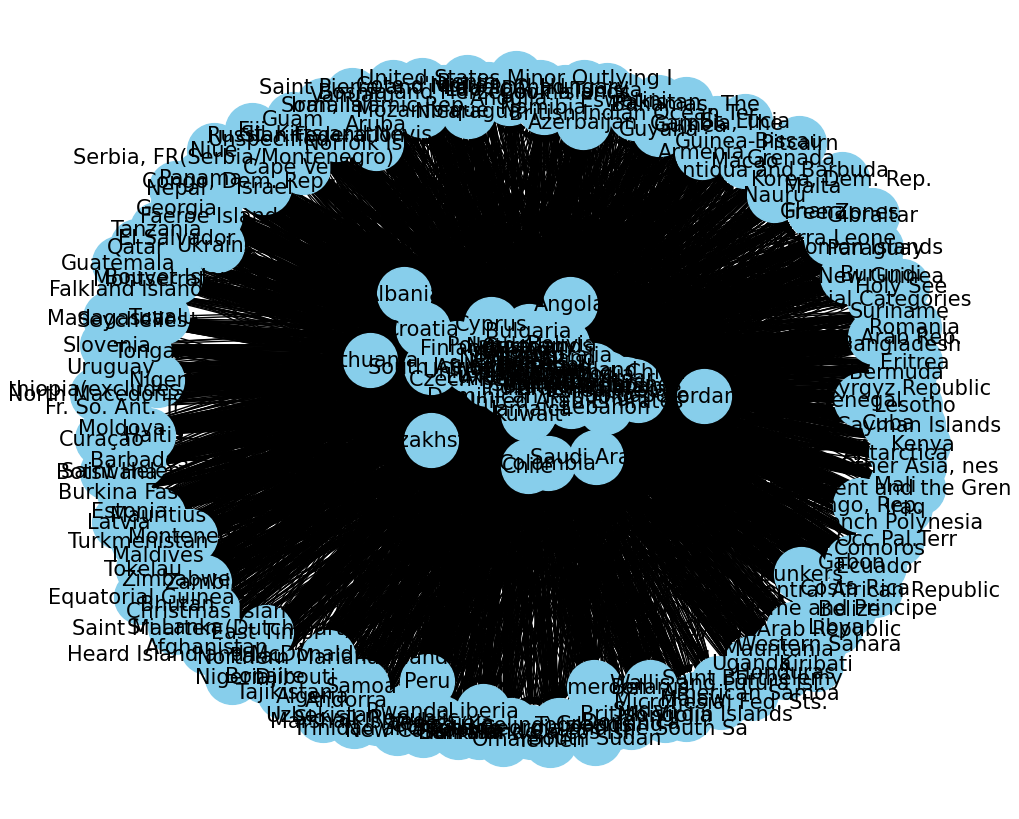

In [ ]:
# Draw the network
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Define layout for the nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='k', linewidths=1, font_size=15)

# Display the plot
plt.show()

In [ ]:
# Calculate the density
density = nx.density(G)

# Print or use the density
print("Network density:", density)

Network density: 0.1769315321065135


In [ ]:
# Get degree of a specific node
specific_node = 'China'

weighted_degree = G.degree(specific_node, weight='weight')  # Weighted degree
unweighted_degree = G.degree(specific_node)  # Unweighted degree (number of edges)

print("Weighted degree of", specific_node, ":", weighted_degree)
print("Unweighted degree of", specific_node, ":", unweighted_degree)

Weighted degree of China : 2130419033.2400007
Unweighted degree of China : 271


In [ ]:
# Get weight between two countries
exporting_country = 'China'
importing_country = 'India'
if G.has_edge(exporting_country, importing_country):
    weight = G[exporting_country][importing_country]['weight']
    print(f"Product value from {exporting_country} to {importing_country}: ${weight}")
else:
    print(f"No product value between {exporting_country} and {importing_country}")

Product value from China to India: $45884096.03


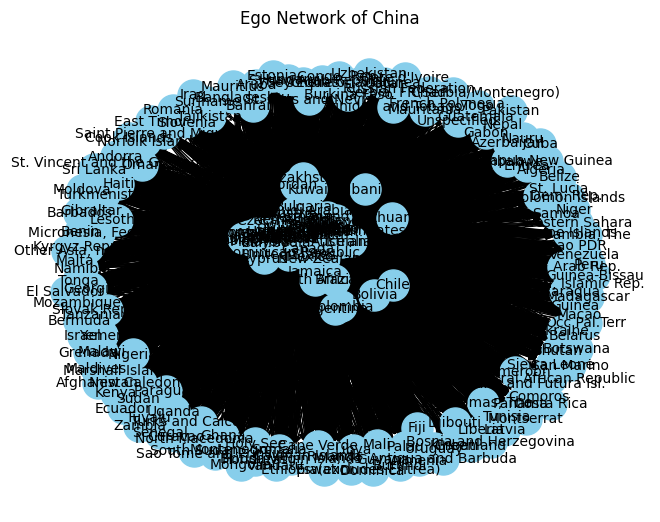

In [ ]:
# Visualizing an ego nwtwork
# specifying the ego
ego_node = 'China'

#Extract the subgraph containing the specific node and its neighbors
subgraph = nx.ego_graph(G, ego_node, radius=1)

# Plot
pos = nx.spring_layout(subgraph)  # Define positions of nodes using a spring layout
nx.draw(subgraph, pos, with_labels=True, node_color='skyblue', node_size=500, font_size=10)
plt.title("Ego Network of " + ego_node)
plt.show()

In [ ]:
# Calculate degree assortativity
degree_assortativity = nx.degree_assortativity_coefficient(G)

# Print or use the degree assortativity
print("Degree assortativity coefficient:", degree_assortativity)

Degree assortativity coefficient: -0.25694580187307386


In [ ]:
# Calculate degree centrality for a specific node
specific_node = 'China'

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Get the degree centrality of the specific node
specific_node_degree_centrality = degree_centrality[specific_node]

# Print the degree centrality of the specific node
print("Degree centrality of", specific_node, ":", specific_node_degree_centrality)

Degree centrality of China : 1.1434599156118141


In [ ]:
# calculate closeness centrality of a specific node
specific_node = 'China'

# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Get the closeness centrality of the specific node
specific_node_closeness_centrality = closeness_centrality[specific_node]

# Print or use the closeness centrality of the specific node
print("Closeness centrality of", specific_node, ":", specific_node_closeness_centrality)

Closeness centrality of China : 0.2490143183233036


In [ ]:
# Find the node with the maximum number of links
max_links_node = None
max_links = float('-inf')

for node in G.nodes():
    num_links = G.degree(node)
    if num_links > max_links:
        max_links = num_links
        max_links_node = node

# Print or use the node with the maximum number of links
print("Node with maximum number of links:", max_links_node, "with number of links:", max_links)

Node with maximum number of links: Germany with number of links: 289


In [ ]:
# Find the node with the maximum weighted degree
max_weighted_degree_node = None
max_weighted_degree = float('-inf')

for node in G.nodes():
    weighted_degree = sum(weight for _, _, weight in G.edges(node, data='weight'))
    if weighted_degree > max_weighted_degree:
        max_weighted_degree = weighted_degree
        max_weighted_degree_node = node

# Print or use the node with the maximum weighted degree
print("Node with maximum weighted degree:", max_weighted_degree_node, "with weighted degree:", max_weighted_degree)

Node with maximum weighted degree: China with weighted degree: 1445623424.7300007


In [ ]:
# Find the node with the minimum number of links
min_links_node = None
min_links = float('inf')

for node in G.nodes():
    num_links = G.degree(node)
    if num_links < min_links:
        min_links = num_links
        min_links_node = node

# Print or use the node with the minimum number of links
print("Node with minimum number of links:", min_links_node, "with number of links:", min_links)

Node with minimum number of links: Free Zones with number of links: 3


In [ ]:
# Find the node with the minimum weighted degree
min_weighted_degree_node = None
min_weighted_degree = float('inf')

for node in G.nodes():
    weighted_degree = sum(weight for _, _, weight in G.edges(node, data='weight'))
    if weighted_degree < min_weighted_degree:
        min_weighted_degree = weighted_degree
        min_weighted_degree_node = node

# Print or use the node with the minimum weighted degree
print("Node with minimum weighted degree:", min_weighted_degree_node, "with weighted degree:", min_weighted_degree)

Node with minimum weighted degree: Montenegro with weighted degree: 0


In [ ]:
# Calculate distance for a specific node
specific_node = 'China'
# Calculate shortest path lengths from the specific node to all other nodes
shortest_path_lengths = nx.single_source_dijkstra_path_length(G, source=specific_node, weight='weight')

# Print the first few rows
num_rows_to_print = 5
print("Shortest path lengths from", specific_node, "to other nodes:")
for node, distance in list(shortest_path_lengths.items())[:num_rows_to_print]:
    print("Node:", node, "Distance:", distance)

Shortest path lengths from China to other nodes:
Node: China Distance: 0
Node: Saint Pierre and Miquelon Distance: 67.97
Node: Montserrat Distance: 110.23
Node: Holy See Distance: 139.28
Node: Greenland Distance: 165.64


In [ ]:
# Calculate shortest distance for a specific node
specific_node = 'China'

# Calculate the shortest path from the specific node to all other nodes
shortest_paths = nx.single_source_dijkstra(G, source=specific_node, weight='weight')

# Find the node with which the specific node has the shortest distance
closest_node = min(shortest_paths[1], key=shortest_paths[1].get)

# Print or use the closest node
print("The node with which", specific_node, "has the shortest distance is:", closest_node)

The node with which China has the shortest distance is: China


In [ ]:
# Calculate shortest distance for a specific node
specific_node = 'China'

# Calculate shortest path lengths from the specific node to all other nodes
shortest_path_lengths = nx.single_source_dijkstra_path_length(G, source=specific_node, weight='weight')

# Exclude the specific node itself from the result
shortest_path_lengths_excluding_specific_node = {node: distance for node, distance in shortest_path_lengths.items() if node != specific_node}

# Find the node with which the specific node has the shortest distance
closest_node = min(shortest_path_lengths_excluding_specific_node, key=shortest_path_lengths_excluding_specific_node.get)

# Print or use the closest node
print("The node with which", specific_node, "has the shortest distance (excluding itself) is:", closest_node)

The node with which China has the shortest distance (excluding itself) is: Saint Pierre and Miquelon


In [ ]:
# Calculate farthest distance for a specific node
specific_node = 'China'

# Shortest path lengths from the specific node to all other nodes
shortest_path_lengths = nx.single_source_dijkstra_path_length(G, source=specific_node, weight='weight')

# Find the node with which the specific node has the farthest distance
farthest_node = max(shortest_path_lengths, key=shortest_path_lengths.get)

# Print or use the farthest node
print("The node with which", specific_node, "has the longest distance is:", farthest_node)

The node with which China has the longest distance is: United States


In [ ]:
# Calculate distance two specific nodes
node1 = 'China'
node2 = 'Japan'

# Calculate the shortest path length between the two specific nodes
shortest_distance = nx.shortest_path_length(G, source=node1, target=node2, weight='weight')

# Print or use the shortest distance
print("Shortest distance between", node1, "and", node2, ":", shortest_distance)

Shortest distance between China and Japan : 114097.23000000001


In [ ]:
# Select top 50 exporting countries
# Aggregate the total value for each source country
source_total_values = grouped_data.groupby('Source')['Value'].sum()
# Sort the countries based on their total value
sorted_sources = source_total_values.sort_values(ascending=False)
# Select the top 50 sources
top_50_sources = sorted_sources.head(50)

# Display the top 50 sources
print(top_50_sources)

Source
China                   1.445623e+09
Hong Kong, China        4.886358e+08
Germany                 4.421984e+08
United States           3.755063e+08
Korea, Rep.             2.737579e+08
Japan                   2.477288e+08
Singapore               2.268438e+08
Mexico                  1.684611e+08
Vietnam                 1.554092e+08
Italy                   1.462600e+08
Netherlands             1.439497e+08
Malaysia                1.274704e+08
France                  1.066044e+08
United Kingdom          9.425354e+07
Czech Republic          8.526669e+07
Thailand                8.432300e+07
Poland                  7.978356e+07
United Arab Emirates    5.263883e+07
Austria                 4.820728e+07
Philippines             4.724676e+07
Canada                  4.547847e+07
Spain                   4.486463e+07
Sweden                  4.432448e+07
India                   4.299197e+07
Switzerland             3.757048e+07
Belgium                 3.700191e+07
Turkey                  3.27821

In [ ]:
# Specify the source country you want to view
specific_source_country = 'China'  # Change this to the country you want to view

# Filter the dataset to show rows where the source column matches the specific country
specific_source_data = grouped_data[grouped_data['Source'] == specific_source_country]

# Calculate the total value of the specific source country
total_value_specific_source = specific_source_data['Value'].sum()
# Display the total value of the specific source country
print(f"Total value exported by {specific_source_country}: {total_value_specific_source}")

Total value exported by China: 1445623424.73
